<a href="https://colab.research.google.com/github/2loopoff/MLHomeworks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0_%D0%BE%D0%B4%D0%B8%D0%BD_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Titanic dataset:

In [ ]:
!wget https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv

--2020-09-27 18:38:24--  https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2020/master/seminar01/train.csv [following]
--2020-09-27 18:38:24--  https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2020/master/seminar01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.03s   

2020-09-27 18:38:24 (2.25 MB/s) - ‘train.csv.1’ saved [60302/60302]



In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1

In [ ]:
# Compute survaval rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)
# aa = data.groupby(by=['Survived','Pclass'])
# ~(aa['Survived'] > 0)
aa = data.loc[:,('Survived','Pclass')]
len(aa)
matrix = np.zeros(6).reshape(3,2)
print(matrix)
aa.Survived
for i in range(len(aa)):
  bb=aa.iloc[i]
  matrix[bb.Pclass-1,bb.Survived]+=1
  
for i in range(3):
  print('survaval rate for ',i+1,'class:',round(matrix[i,1]/(matrix[i,0]+matrix[i,1])*100,1),'%')

[[0. 0.]
 [0. 0.]
 [0. 0.]]
survaval rate for  1 class: 63.0 %
survaval rate for  2 class: 47.3 %
survaval rate for  3 class: 24.2 %


## Task 2

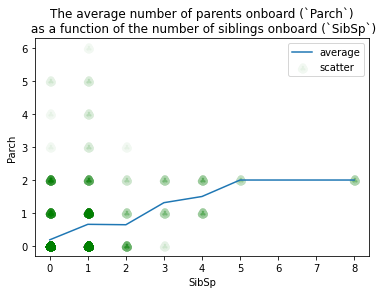

In [ ]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt
subdata = data.loc[:,("SibSp","Parch")]
plt.scatter(subdata.SibSp,subdata.Parch,alpha = 0.05,linewidths=5, marker=r'$\clubsuit$',color='g',label = 'scatter')
xx = np.unique(subdata.SibSp)
yy = [np.mean(subdata.loc[subdata.SibSp == _x]).Parch for _x in xx]
plt.plot(xx,yy,label = 'average')
plt.title("The average number of parents onboard (`Parch`)\n as a function of the number of siblings onboard (`SibSp`)")
plt.xlabel("SibSp")
plt.ylabel("Parch");
plt.legend()
# <YOUR CODE>

## Task 3

In [ ]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from pandas import Series



def feature_selection_and_preprocessing(dataset):
  features = dataset[["Fare", "Parch",]].copy()
  features['Fare'] *= np.log(features['Fare']+0.0001)

  features['Parch'] *=  pow(features['Parch'],0.001)

  return features

model = KNeighborsClassifier(
    n_neighbors=10,
    p=1
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]#if :-2 then 1.0 :))

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.77


## Task 4

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

100%|██████████| 900/900 [00:14<00:00, 61.52it/s]


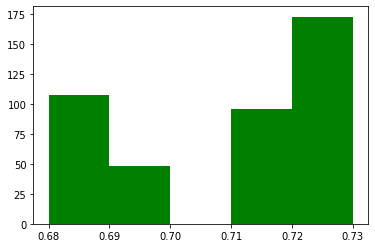

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import trange
from random import randint

hh = []
for i in trange(900):
  X_train, X_test, y_train, y_test = train_test_split(data,data.drop('Survived', axis=1) , test_size=100, random_state=randint(0,i))
  test_predictions = model.predict(
      feature_selection_and_preprocessing(
          X_test.drop('Survived', axis=1)
      )
  )
  # print(accuracy_score(X_test['Survived'],test_predictions))
  hh.append(accuracy_score(X_test['Survived'],test_predictions)
  )


(array([ 15.,  92., 156., 348., 208.]),
 array([0.6  , 0.636, 0.672, 0.708, 0.744, 0.78 ]),
 <a list of 5 Patch objects>)

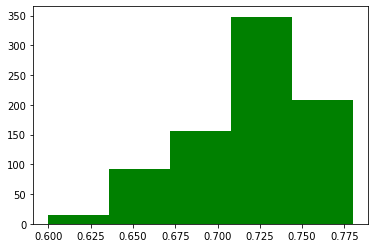

In [ ]:
plt.hist(hh,color='g',bins=5,range=(0.60,0.78))

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)
results

{791: 0.73}

In [ ]:
randint(1,2)

1